In [30]:
# Load the first 100,000 rows from the csv file 

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_90b10fbeca6c4d058035417d934397fa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eGM4hoDEBWEHIkj2wVo951MSw9QUVyaLAPd3wvsnVQMk',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_90b10fbeca6c4d058035417d934397fa.get_object(Bucket='nycproject-donotdelete-pr-dcxrsxebrzgstt',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body,nrows=100000)
df_data_1.head()



,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2013-01-11T13:25:34.000,24765056,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,The literature has been mailed. If it has not ...,Unspecified,NaN,NaN,2013-01-11T15:01:56.000,NaN,Closed
1,2018-08-11T19:19:41.000,39981834,PAINT/PLASTER,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:02.000,RESIDENTIAL BUILDING,Closed
2,2018-08-11T19:19:41.000,39982698,APPLIANCE,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:01.000,RESIDENTIAL BUILDING,Closed
3,2018-08-11T19:19:41.000,39987943,UNSANITARY CONDITION,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:01.000,RESIDENTIAL BUILDING,Closed
4,2018-10-23T19:27:06.000,40636028,DOOR/WINDOW,11412.0,116-35 195 STREET,195 STREET,ADDRESS,Saint Albans,The Department of Housing Preservation and Dev...,QUEENS,40.693715,-73.757117,2019-03-30T08:58:02.000,RESIDENTIAL BUILDING,Closed


In [31]:
# We only take the the date, zipcode, and the complaint type and convert everything into upper case for uniformity  

df_data_1 = df_data_1[['created_date','complaint_type', 'incident_zip']]
df_data_1 = df_data_1.apply(lambda x: x.astype(str).str.upper())

In [32]:
# Create a list to see what kind of complaints exist

df_data_1['complaint_type'].unique()

array(['HPD LITERATURE REQUEST', 'PAINT/PLASTER', 'APPLIANCE',
       'UNSANITARY CONDITION', 'DOOR/WINDOW', 'WATER LEAK', 'PLUMBING',
       'GENERAL', 'FLOORING/STAIRS', 'ELECTRIC', 'ELEVATOR',
       'OUTSIDE BUILDING', 'SAFETY', 'HEAT/HOT WATER', 'HEATING',
       'GENERAL CONSTRUCTION', 'PAINT - PLASTER', 'NONCONST',
       'CONSTRUCTION'], dtype=object)

In [33]:
# Obtain just year from date created column

df_data_1['year'] = pd.DatetimeIndex(df_data_1['created_date']).year
df_data_1 = df_data_1.drop('created_date', axis = 1)
df_data_1 = df_data_1.iloc[1:]
df_data_1

,complaint_type,incident_zip,year
1,PAINT/PLASTER,11429.0,2018
2,APPLIANCE,11429.0,2018
3,UNSANITARY CONDITION,11429.0,2018
4,DOOR/WINDOW,11412.0,2018
5,UNSANITARY CONDITION,11412.0,2018
6,UNSANITARY CONDITION,11412.0,2018
7,WATER LEAK,11412.0,2018
8,UNSANITARY CONDITION,10024.0,2018
9,UNSANITARY CONDITION,11435.0,2018
10,PAINT/PLASTER,10456.0,2019


In [34]:
# Create dummies for complaint_types

df_data_1['code'] = pd.factorize(df_data_1['complaint_type'] )[0]

In [35]:
# Clean data by dropping NaN and NAN

df_data_1 = df_data_1.dropna()
df_data_1.drop(df_data_1[df_data_1.incident_zip == 'NAN'].index, inplace=True)
df_data_1.head()

,complaint_type,incident_zip,year,code
1,PAINT/PLASTER,11429.0,2018,0
2,APPLIANCE,11429.0,2018,1
3,UNSANITARY CONDITION,11429.0,2018,2
4,DOOR/WINDOW,11412.0,2018,3
5,UNSANITARY CONDITION,11412.0,2018,2
6,UNSANITARY CONDITION,11412.0,2018,2
7,WATER LEAK,11412.0,2018,4
8,UNSANITARY CONDITION,10024.0,2018,2
9,UNSANITARY CONDITION,11435.0,2018,2
10,PAINT/PLASTER,10456.0,2019,0


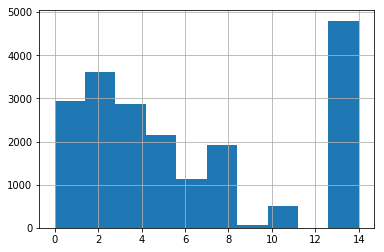

In [36]:
# Histogram showing the number of complaints

import matplotlib.pyplot as plt
df_data_1.head(20000).code.hist()
plt.show()

In [37]:
# Creating train and test dataset 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
y = df_data_1[['code']]
x = df_data_1[['year','incident_zip']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (27669, 2) (27669, 1)
Test set: (6918, 2) (6918, 1)


In [47]:
# K-Neighbors classification and model evalutation 

k = 500
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Train set Accuracy:  0.26827857891503126
Test set Accuracy:  0.26712922810060713
